In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
# Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Part 2 - Now let's make the ANN!

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5457 - accuracy: 0.7751 - val_loss: 0.5170 - val_accuracy: 0.7906
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7921 - val_loss: 0.4925 - val_accuracy: 0.7917
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4832 - accuracy: 0.7927 - val_loss: 0.4778 - val_accuracy: 0.7917
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4695 - accuracy: 0.7940 - val_loss: 0.4683 - val_accuracy: 0.7925
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4603 - accuracy: 0.7953 - val_loss: 0.4612 - val_accuracy: 0.7936
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4532 - accuracy: 0.7970 - val_loss: 0.4558 - val_accuracy: 0.7929
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4472 - accuracy: 0.7975 - val_loss: 0.4511 - val_accuracy: 0.7936

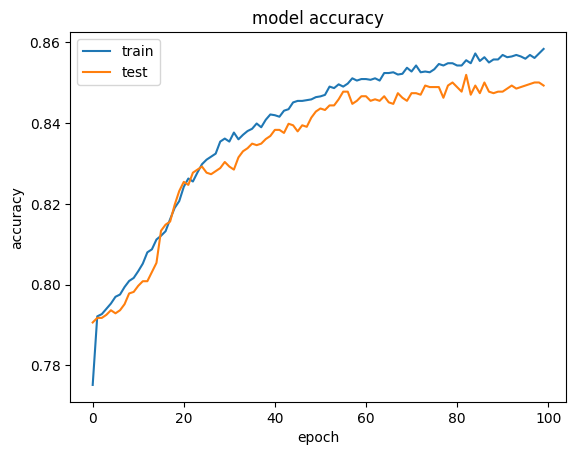

In [6]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

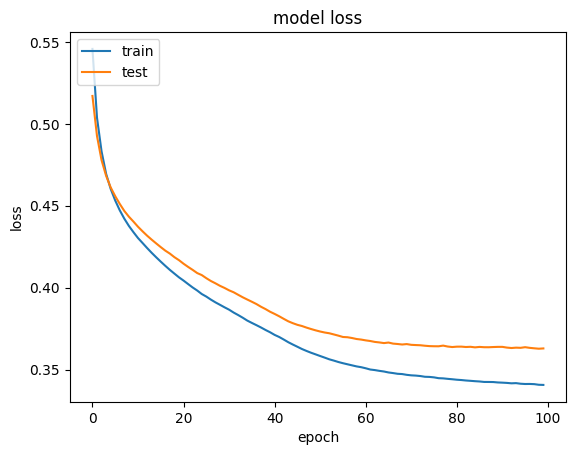

In [7]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

63/63 [==============================] - 0s 557us/step


In [9]:
cm

array([[1513,   82],
       [ 199,  206]], dtype=int64)

In [10]:
score

0.8595